# imports 

In [1]:
from pathlib import Path

import weasyprint

# use weasyprint to convert HTML -> PDF for OCR - takes a few secs

In [2]:
# Get the absolute path to your HTML file
html_file_path = Path("/home/mlin/repos/z_scratch/financial-rag/data/sec_filings/raw_htmls/CRDO_000180779425000021_10-Q_2025-09-04.html")
# The source needs to be a file URL
source_url = f'file://{html_file_path.absolute()}' 

In [4]:


output_path = 'out.pdf'

# Generate the PDF
weasyprint.HTML(source_url).write_pdf(output_path)
print(f"PDF generated at {output_path}")

PDF generated at out.pdf


In [7]:
output_path = 'out_landscape.pdf'

# Choose one:
PAGE_CSS = """
@page { size: Letter landscape; margin: 12mm; }
html, body { margin: 0; }
"""

# Or for A4:
# PAGE_CSS = "@page { size: A4 landscape; margin: 12mm; } html, body { margin: 0; }"

weasyprint.HTML(source_url).write_pdf(
    output_path,
    stylesheets=[weasyprint.CSS(string=PAGE_CSS)],
)
print(f"PDF generated at {output_path}")

PDF generated at out_landscape.pdf


- 1514 × 830
- 1203 x 815

ok, can find: `<hr style="page-break-after:always"/>` is this page break?  yes

## trying to use page-break-after as a boundary - looks like information is getting lost? eg tables are getting cropped at the end (page 18/page 10)

In [9]:
output_path = 'out_landscape_breaks.pdf'

W_IN = 1514 / 96
H_IN = 830 / 96

# first part sets landscape orientation
# second part handles page-breaks 
css = weasyprint.CSS(string=f"""
@page {{ size: {W_IN:.3f}in {H_IN:.3f}in; margin: 8mm; }}
html, body {{ margin: 0; }}
""" + """
/* Keep existing EDGAR breaks, and make them unambiguous to WeasyPrint */
hr[style*="page-break-after"] {
  break-after: page;
  page-break-after: always;
  border: 0;
  height: 0;
  margin: 0;
  padding: 0;
}

/* Optional: avoid lonely table rows split across pages */
table, tr, td { break-inside: avoid; }
""")

# zoom out a little to ensure content fits
weasyprint.HTML(source_url).write_pdf(output_path, stylesheets=[css], zoom=0.7)

## allow table to span multiple pages if really needed.

In [13]:
output_path = 'out_landscape_breaks_longer_zoom60.pdf'

W_IN = 1500 / 96
H_IN = 1200 / 96

# first part sets landscape orientation
# second part handles page-breaks 
css = weasyprint.CSS(string=f"""
@page {{ size: {W_IN:.3f}in {H_IN:.3f}in; margin: 8mm; }}
html, body {{ margin: 0; }}
""" + """
/* Turn EDGAR <hr page-break-after> into hard page boundaries */
hr[style*="page-break-after"] {{
  break-after: page;
  page-break-after: always;
  border: 0; height: 0; margin: 0; padding: 0;
}}

/* IMPORTANT: allow multi-page tables */
table {{
  break-inside: auto;          /* allow splitting */
  page-break-inside: auto;     /* legacy */
}}

/* Optional: keep individual rows together (usually OK) */
tr {{
  break-inside: avoid;
  page-break-inside: avoid;
}}

/* Optional but helpful: repeat header row on each page */
thead {{ display: table-header-group; }}
tfoot {{ display: table-footer-group; }}
""")

# zoom out a little to ensure content fits
weasyprint.HTML(source_url).write_pdf(output_path, stylesheets=[css], zoom=0.6)


In [17]:
output_path = 'out_landscape_breaks_longer_zoom50.pdf'

W_IN = 1450 / 96
H_IN = 1250 / 96

# first part sets landscape orientation
# second part handles page-breaks 
css = weasyprint.CSS(string=f"""
@page {{ size: {W_IN:.3f}in {H_IN:.3f}in; margin: 4mm; }}
html, body {{ margin: 0; }}
""" + """
/* Turn EDGAR <hr page-break-after> into hard page boundaries */
hr[style*="page-break-after"] {{
  break-after: page;
  page-break-after: always;
  border: 0; height: 0; margin: 0; padding: 0;
}}

/* IMPORTANT: allow multi-page tables */
table {{
  break-inside: auto;          /* allow splitting */
  page-break-inside: auto;     /* legacy */
}}

/* Optional: keep individual rows together (usually OK) */
tr {{
  break-inside: avoid;
  page-break-inside: avoid;
}}

/* Optional but helpful: repeat header row on each page */
thead {{ display: table-header-group; }}
tfoot {{ display: table-footer-group; }}
""")

# zoom out a little to ensure content fits
weasyprint.HTML(source_url).write_pdf(output_path, stylesheets=[css], zoom=0.5)


still cannot fit some long tables
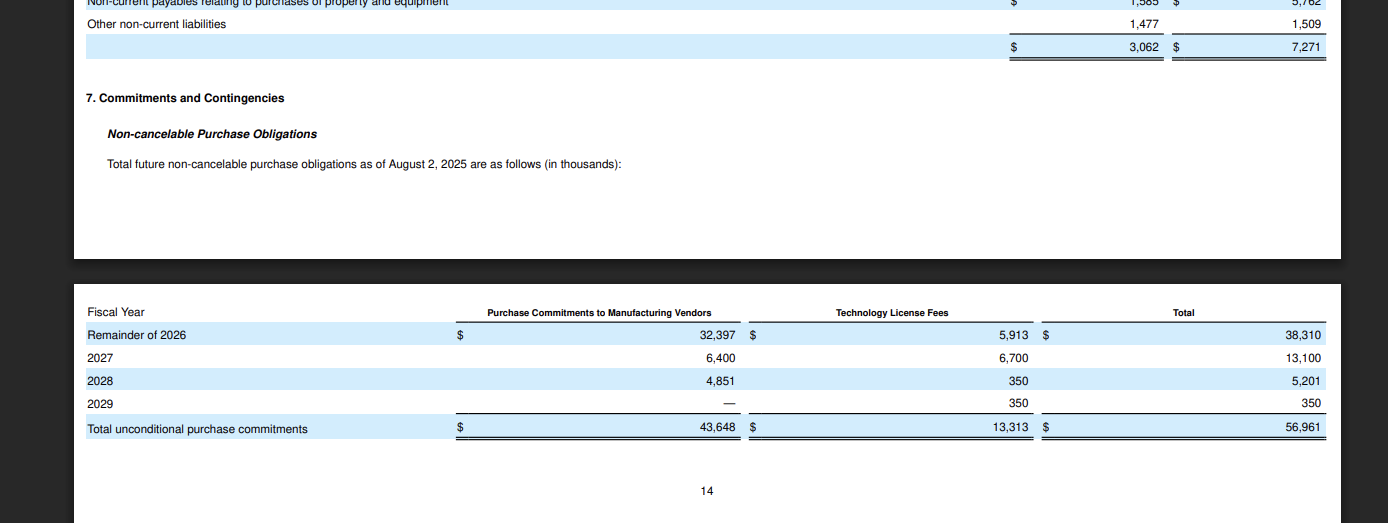

## try last time. already at 32 pages, lets see if we can get to 28 - best so far is 30 

In [19]:
output_path = 'out_landscape_breaks_1400w_1350h_zoom45.pdf'

W_IN = 1400 / 96
H_IN = 1350 / 96

# first part sets landscape orientation
# second part handles page-breaks 
css = weasyprint.CSS(string=f"""
@page {{ size: {W_IN:.3f}in {H_IN:.3f}in; margin: 4mm; }}
html, body {{ margin: 0; }}
""" + """
/* Turn EDGAR <hr page-break-after> into hard page boundaries */
hr[style*="page-break-after"] {{
  break-after: page;
  page-break-after: always;
  border: 0; height: 0; margin: 0; padding: 0;
}}

/* IMPORTANT: allow multi-page tables */
table {{
  break-inside: auto;          /* allow splitting */
  page-break-inside: auto;     /* legacy */
}}

/* Optional: keep individual rows together (usually OK) */
tr {{
  break-inside: avoid;
  page-break-inside: avoid;
}}

/* Optional but helpful: repeat header row on each page */
thead {{ display: table-header-group; }}
tfoot {{ display: table-footer-group; }}
""")

# zoom out a little to ensure content fits
weasyprint.HTML(source_url).write_pdf(output_path, stylesheets=[css], zoom=0.45)


# try htmlRAG's html cleaner -> loses too much structure, esp tables. dont think this is good for our use-case


```
* Less than 10% of total revenue.Our Business ModelWe are a product-focused business with a strong foundation in IP, pioneering comprehensive connectivity solutions that deliver bandwidth, scalability and end-to-end signal integrity for next-generation platforms. We also develop IP solutions to address the specific and complex needs of our customers. We earn revenue from these IP solutions primarily through licensing fees and royalties. Over time, we expect to generate an increased proportion of our revenue from sales of our products. We expect to see a long-term benefit from improvements in our operating leverage as our business continues to gain scale.We utilize a fabless business model, working with a network of third parties to manufacture, assemble and test our connectivity products. This approach allows us to focus our engineering and design resources on our core competencies and to control our fixed costs and capital expenditures. We employ a two-pronged sales strategy targeting both the end users of our products, as well as the suppliers of our end users. By engaging directly with the end user, we are able to better understand the needs of our customers and cater our solutions to their most pressing connectivity requirements.This strategy has enabled us to become the preferred vendor to a number of our customers who, in turn, in some cases, require their suppliers, OEMs, ODMs and optical module manufacturers to utilize our solutions.20Results of OperationsThree Months Ended August 2, 2025 and August 3, 2024The following table sets forth information derived from our unaudited condensed consolidated statements of operations expressed as a percentage of total revenue:Three Months EndedAugust 2, 2025August 3, 2024Revenue:Product sales revenue97.3 %96.0 %IP license revenue2.7 %4.0 %Total revenue100.0 %100.0 %Cost of revenue32.6 %37.6 %Gross margin67.4 %62.4 %Operating expenses:Research and development23.5 %50.9 %Selling, general and administrative16.7 %35.7 %Total operating expenses40.2 %86.6 %Operating income (loss)27.2 %(24.2)%Other income, net1.8 %9.4 %Income (loss) before income taxes29.0 %(14.9)%Provision for income taxes0.6 %1.0 %Net income (loss)28.4 %(16.0)%
```

In [20]:
from htmlrag import clean_html

In [22]:
html_text = html_file_path.read_text()

In [23]:
cleaned_html = clean_html(html_text)

In [24]:
print(cleaned_html)


<html>
<title>crdo-20250802</title><body><ix:header><ix:hidden><ix:nonnumeric>0001807794</ix:nonnumeric><ix:nonnumeric>FALSE</ix:nonnumeric><ix:nonnumeric>May 2</ix:nonnumeric><ix:nonnumeric>Q1</ix:nonnumeric><ix:nonnumeric>2026</ix:nonnumeric><ix:nonnumeric>P7Y</ix:nonnumeric><ix:nonnumeric>http://fasb.org/us-gaap/2025#OtherLiabilitiesCurrent</ix:nonnumeric><ix:nonnumeric>http://fasb.org/us-gaap/2025#OtherLiabilitiesCurrent</ix:nonnumeric><ix:nonnumeric>357</ix:nonnumeric><ix:nonnumeric>372</ix:nonnumeric><ix:nonnumeric>358</ix:nonnumeric></ix:hidden><ix:resources><xbrli:measure>xbrli:shares</xbrli:measure><xbrli:measure>iso4217:USD</xbrli:measure><xbrli:divide><xbrli:measure>iso4217:USD</xbrli:measure><xbrli:measure>xbrli:shares</xbrli:measure></xbrli:divide><xbrli:measure>xbrli:pure</xbrli:measure><xbrli:context><xbrli:identifier>0001807794</xbrli:identifier><xbrli:period><xbrli:startdate>2025-05-04</xbrli:startdate><xbrli:enddate>2025-08-02</xbrli:enddate></xbrli:period></xbrli:co

In [25]:
len(html_text), len(cleaned_html)

(682008, 145654)

In [27]:
with open("cleaned.html", "w") as f:
    f.write(cleaned_html)

In [26]:
output_path = 'out_cleaned_1400w_1350h_zoom45.pdf'

W_IN = 1400 / 96
H_IN = 1350 / 96

# first part sets landscape orientation
# second part handles page-breaks 
css = weasyprint.CSS(string=f"""
@page {{ size: {W_IN:.3f}in {H_IN:.3f}in; margin: 4mm; }}
html, body {{ margin: 0; }}
""" + """
/* Turn EDGAR <hr page-break-after> into hard page boundaries */
hr[style*="page-break-after"] {{
  break-after: page;
  page-break-after: always;
  border: 0; height: 0; margin: 0; padding: 0;
}}

/* IMPORTANT: allow multi-page tables */
table {{
  break-inside: auto;          /* allow splitting */
  page-break-inside: auto;     /* legacy */
}}

/* Optional: keep individual rows together (usually OK) */
tr {{
  break-inside: avoid;
  page-break-inside: avoid;
}}

/* Optional but helpful: repeat header row on each page */
thead {{ display: table-header-group; }}
tfoot {{ display: table-footer-group; }}
""")

# zoom out a little to ensure content fits
weasyprint.HTML(string=cleaned_html).write_pdf(output_path, stylesheets=[css], zoom=0.45)

# mistral OCR time

# try OlmOCR

## via marker (using OlmOCR model running locally, but not sure if marker prompt is suitable for OlmOCR model)  -> initial observation looks like still fails on equity table. but maybe the rest is more robust. throughput is much lower on A40 tho :( 


## TODO: inject olmOCR's prompt into marker's LLM call logic ??? 

the prompt they use (we probably need to remove the "one page" part if marker is sending multiple images at once)
```python3
def build_no_anchoring_v4_yaml_prompt() -> str:
    return (
        "Attached is one page of a document that you must process. "
        "Just return the plain text representation of this document as if you were reading it naturally. Convert equations to LateX and tables to HTML.\n"
        "If there are any figures or charts, label them with the following markdown syntax ![Alt text describing the contents of the figure](page_startx_starty_width_height.png)\n"
        "Return your output as markdown, with a front matter section on top specifying values for the primary_language, is_rotation_valid, rotation_correction, is_table, and is_diagram parameters."
    )
```

downside of using A40 (gpu4) -> much slower inference than H100 :( also cuz we can't use tensor parallel (A40 doesn't have NVLink). try with `NCCL_P2P_DISABLE=1` 

In [13]:
from marker.converters.pdf import PdfConverter
from marker.models import create_model_dict
from marker.output import text_from_rendered
from marker.config.parser import ConfigParser


openai_api_key = "test"
openai_base_url = "http://0.0.0.0:8989/v1"
model = "allenai/olmOCR-2-7B-1025"

config = {
    "output_format": "chunks",
    "use_llm": True,
    "llm_service": "marker.services.openai.OpenAIService",
    "openai_api_key": openai_api_key,
    "openai_base_url": openai_base_url,
    "openai_image_format": "png",
    "openai_temperature": 0.15,  # HACK
    "openai_model": model,
    "timeout": 120,
    "max_retries": 5,
    # to send even more requests to LLM API
    "max_concurrency": 32,
    "LLMTableProcessor_max_concurrency": 32,
    "disable_image_extraction": True,
    "force_ocr": False,
}
config_parser = ConfigParser(config)

converter = PdfConverter(
    config=config_parser.generate_config_dict(),
    artifact_dict=create_model_dict(),
    processor_list=config_parser.get_processors(),
    renderer=config_parser.get_renderer(),
    llm_service=config_parser.get_llm_service(),
)


### 2 GPUs + 32 concurrency + "chunks" output -> max length reached error?  + chunks look very messy (bcos of subheaders that aren't actually headers)

```
Running LLMSectionHeaderProcessor:   0%|                                     | 0/1 [00:00<?, ?it/s]2025-12-21 23:00:01,593 [ERROR] marker: OpenAI inference failed: Could not parse response content as the length limit was reached - CompletionUsage(completion_tokens=2807, prompt_tokens=13577, total_tokens=16384, completion_tokens_details=None, prompt_tokens_details=None)
2025-12-21 23:00:01,594 [WARNING] marker: LLM did not return a valid response 
```

In [14]:
output_path = 'out_landscape_breaks_1400w_1350h_zoom45.pdf'
rendered = converter(output_path)
text, _, images = text_from_rendered(rendered)


Recognizing Layout: 100%|██████████████████████████████████████████| 30/30 [00:03<00:00,  7.70it/s]

Running OCR Error Detection: 100%|███████████████████████████████████| 3/3 [00:00<00:00, 72.01it/s]

Detecting bboxes: 100%|██████████████████████████████████████████████| 1/1 [00:00<00:00,  8.23it/s]

Recognizing Text: 100%|████████████████████████████████████████████| 77/77 [00:04<00:00, 15.45it/s]

Recognizing tables: 100%|████████████████████████████████████████████| 3/3 [00:02<00:00,  1.44it/s]

Detecting bboxes: 0it [00:00, ?it/s]

LLMTableProcessor running:  11%|████                                | 4/35 [00:40<03:21,  6.49s/it]2025-12-21 22:57:25,199 [INFO] marker: Table rewriting low score 3, on iteration 1

LLMTableProcessor running: 100%|███████████████████████████████████| 35/35 [01:51<00:00,  3.19s/it]

LLMTableMergeProcessor running: 100%|████████████████████████████████| 2/2 [00:06<00:00,  3.31s/it]

LLM processors running: 100%|████████████████████████████████████████| 

In [15]:
rendered

ChunkOutput(blocks=[FlatBlockOutput(id='/page/0/SectionHeader/0', block_type='SectionHeader', html='<h1><b>UNITED STATES</b> <b>SECURITIES AND EXCHANGE COMMISSION</b></h1>', page=266, polygon=[[149.26651000976562, 32.82183837890625], [334.6856994628906, 32.82183837890625], [334.6856994628906, 50.641815185546875], [149.26651000976562, 50.641815185546875]], bbox=[149.26651000976562, 32.82183837890625, 334.6856994628906, 50.641815185546875], section_hierarchy={1: '/page/0/SectionHeader/0'}, images={}), FlatBlockOutput(id='/page/0/Text/1', block_type='Text', html='<p block-type="Text"><b>Washington, D.C. 20549</b></p>', page=266, polygon=[[208.3232421875, 53.66015625], [269.3718566894531, 53.66015625], [269.3718566894531, 60.714447021484375], [208.3232421875, 60.714447021484375]], bbox=[208.3232421875, 53.66015625, 269.3718566894531, 60.714447021484375], section_hierarchy={1: '/page/0/SectionHeader/0'}, images={}), FlatBlockOutput(id='/page/0/SectionHeader/2', block_type='SectionHeader', h

In [16]:
llm_err_total = 0
page_cnt = 0
for page_meta in rendered.metadata["page_stats"]:
    block_meta = page_meta["block_metadata"]
    llm_err_total += block_meta["llm_error_count"]
    page_cnt += 1
print(f"{llm_err_total=} out of {page_cnt=}")

llm_err_total=0 out of page_cnt=30


In [45]:
type(rendered)

marker.renderers.chunk.ChunkOutput

In [44]:
rendered.blocks[26]

FlatBlockOutput(id='/page/5/Text/4', block_type='Text', html='<p block-type="Text"><b>Three Months Ended</b></p>', page=306, polygon=[[390.02691650390625, 62.470489501953125], [429.94622802734375, 62.470489501953125], [429.94622802734375, 66.07028198242188], [390.02691650390625, 66.07028198242188]], bbox=[390.02691650390625, 62.470489501953125, 429.94622802734375, 66.07028198242188], section_hierarchy={1: '/page/0/SectionHeader/2', 3: '/page/5/SectionHeader/0'}, images={})

### again with 2 GPUs (albeit with custom all reduce disabled) + higher timeout threshold of 120 x 5

In [6]:
output_path = 'out_landscape_breaks_1400w_1350h_zoom45.pdf'
rendered = converter(output_path)
text, _, images = text_from_rendered(rendered)

with open("markdown_olmocr_temp0.15_noprompt.md", "w") as f:
    f.write(rendered.markdown)


Recognizing Layout: 100%|██████████████████████████████████████████| 30/30 [00:03<00:00,  7.69it/s]

Running OCR Error Detection: 100%|███████████████████████████████████| 3/3 [00:00<00:00, 70.87it/s]

Detecting bboxes: 100%|██████████████████████████████████████████████| 1/1 [00:00<00:00,  7.97it/s]

Recognizing Text: 100%|████████████████████████████████████████████| 77/77 [00:04<00:00, 15.48it/s]

Recognizing tables: 100%|████████████████████████████████████████████| 3/3 [00:02<00:00,  1.39it/s]

Detecting bboxes: 0it [00:00, ?it/s]

LLMTableProcessor running: 100%|███████████████████████████████████| 35/35 [03:21<00:00,  5.76s/it]

LLMTableMergeProcessor running: 100%|████████████████████████████████| 2/2 [00:08<00:00,  4.25s/it]

LLM processors running: 100%|████████████████████████████████████████| 2/2 [00:16<00:00,  8.34s/it]

Running LLMSectionHeaderProcessor: 100%|█████████████████████████████| 1/1 [00:29<00:00, 29.16s/it]


### sum up the llm_error_count

In [10]:
llm_err_total = 0
page_cnt = 0
for page_meta in rendered.metadata["page_stats"]:
    block_meta = page_meta["block_metadata"]
    llm_err_total += block_meta["llm_error_count"]
    page_cnt += 1
print(f"{llm_err_total=} out of {page_cnt=}")

llm_err_total=0 out of page_cnt=30


### with only 1 GPU and insufficient timeout threshold

In [3]:
output_path = 'out_landscape_breaks_1400w_1350h_zoom45.pdf'
rendered = converter(output_path)
text, _, images = text_from_rendered(rendered)

# with open("markdown_32kcontext.md", "w") as f:
with open("markdown_olmocr_temp0.15_noprompt.md", "w") as f:
    f.write(rendered.markdown)

Recognizing tables: 100%|████████████████████████████████████████████| 3/3 [00:02<00:00,  1.43it/s]
Detecting bboxes: 0it [00:00, ?it/s]
LLMTableProcessor running:  77%|███████████████████████████        | 27/35 [05:38<01:04,  8.02s/it]2025-12-21 21:47:13,621 [INFO] marker: Table rewriting low score 3, on iteration 1
2025-12-21 21:47:22,995 [INFO] marker: Table rewriting low score 3, on iteration 1
Running LLMSectionHeaderProcessor: 100%|█████████████████████████████| 1/1 [01:35<00:00, 95.44s/it]


## via CLI (need to set up separate venv for olmocr due to its special pytorch dependencies)

In [ ]:
# Use external vLLM server instead of local one
!python -m olmocr.pipeline \
    ./localworkspace --server http://remote-server:8000/v1 \
    --model allenai/olmOCR-2-7B-1025 --markdown \
    --pdfs ./*.pdf

# try datalab's marker for PDF -> markdown -> TODO: how to improve accuracy?? set temperature to 0.15? i need to fork... or find a way to hack it somehow
# ok, it is also possible that Mistral 14B is not good. I could try a different model like GPT OSS or Qwen. can also try: mistralai/Pixtral-12B-2409

In [3]:
from marker.converters.pdf import PdfConverter
from marker.models import create_model_dict
from marker.output import text_from_rendered
from marker.config.parser import ConfigParser


openai_api_key = "test"
openai_base_url = "http://192.168.3.184:8989/v1"
model = "mistralai/Ministral-3-14B-Instruct-2512"

config = {
    "output_format": "markdown",
    "use_llm": True,
    "llm_service": "marker.services.openai.OpenAIService",
    "openai_api_key": openai_api_key,
    "openai_base_url": openai_base_url,
    "openai_temperature": 0.15,  # HACK
    "openai_model": model,
    "disable_image_extraction": True,
    "force_ocr": False,
}
config_parser = ConfigParser(config)

converter = PdfConverter(
    config=config_parser.generate_config_dict(),
    artifact_dict=create_model_dict(),
    processor_list=config_parser.get_processors(),
    renderer=config_parser.get_renderer(),
    llm_service=config_parser.get_llm_service(),
    
    # llm_service="marker.services.openai.OpenAIService",
    # config={
    #     "use_llm": True,
    #     "OpenAIService_openai_api_key": openai_api_key,
    #     "OpenAIService_openai_base_url": openai_base_url,
    #     "OpenAIService_openai_model": model,
    # },
)


## check out ConfigParser class
```
configure --openai_api_key, --openai_model, and --openai_base_url. To use it, set --llm_service=marker.services.openai.OpenAIService.

also, set --disable_image_extraction

finally, can try --force_ocr , doubtful if this will really help...
```

TO TRY: --paginate_output

# with temperature 0.15 -> Shareholder's table still fails. but at least no errors or warnings? Revenue table fails (need to check if it happeend before) -> no, original was fine
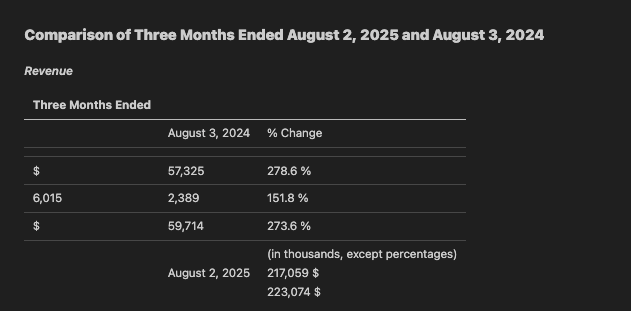

no, in the original 32kcontext.md, this table was fine lol

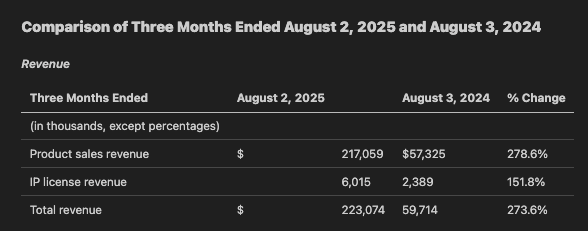

In [ ]:

    # openai_temperature: Annotated[
    #     float, "The temperature to use for the OpenAI-like service.",
    # ] = 0.7


    #                 temperature=self.openai_temperature,

In [4]:
output_path = 'out_landscape_breaks_1400w_1350h_zoom45.pdf'
rendered = converter(output_path)
text, _, images = text_from_rendered(rendered)

Recognizing tables: 100%|████████████████████████████████████████████| 3/3 [00:02<00:00,  1.43it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Running LLMSectionHeaderProcessor: 100%|█████████████████████████████| 1/1 [00:56<00:00, 56.82s/it]


In [5]:
# with open("markdown_32kcontext.md", "w") as f:
with open("markdown_32k_temp0.15.md", "w") as f:
    f.write(rendered.markdown)

## with --force_ocr

In [69]:
output_path = 'out_landscape_breaks_1400w_1350h_zoom45.pdf'
rendered = converter(output_path)
text, _, images = text_from_rendered(rendered)

LLMTableProcessor running:  60%|█████████████████████              | 21/35 [01:21<01:33,  6.69s/it]2025-12-18 02:47:45,863 [INFO] marker: Table parsing warning: too many columns found
2025-12-18 02:47:45,864 [INFO] marker: Table parsing warning: too many columns found
2025-12-18 02:47:45,865 [INFO] marker: Table parsing warning: too many columns found
2025-12-18 02:47:45,866 [INFO] marker: Table parsing warning: too many columns found
2025-12-18 02:47:45,867 [INFO] marker: Table parsing warning: too many columns found
2025-12-18 02:47:45,868 [INFO] marker: Table parsing warning: too many columns found
2025-12-18 02:47:45,869 [INFO] marker: Table parsing warning: too many columns found
Running LLMSectionHeaderProcessor: 100%|█████████████████████████████| 1/1 [00:12<00:00, 12.97s/it]


In [70]:
# with open("markdown_32kcontext.md", "w") as f:
with open("markdown_32k_forceocr.md", "w") as f:
    f.write(rendered.markdown)

# initial result with 16k max context -> not good, first table is already messed up (wrong column alignment)
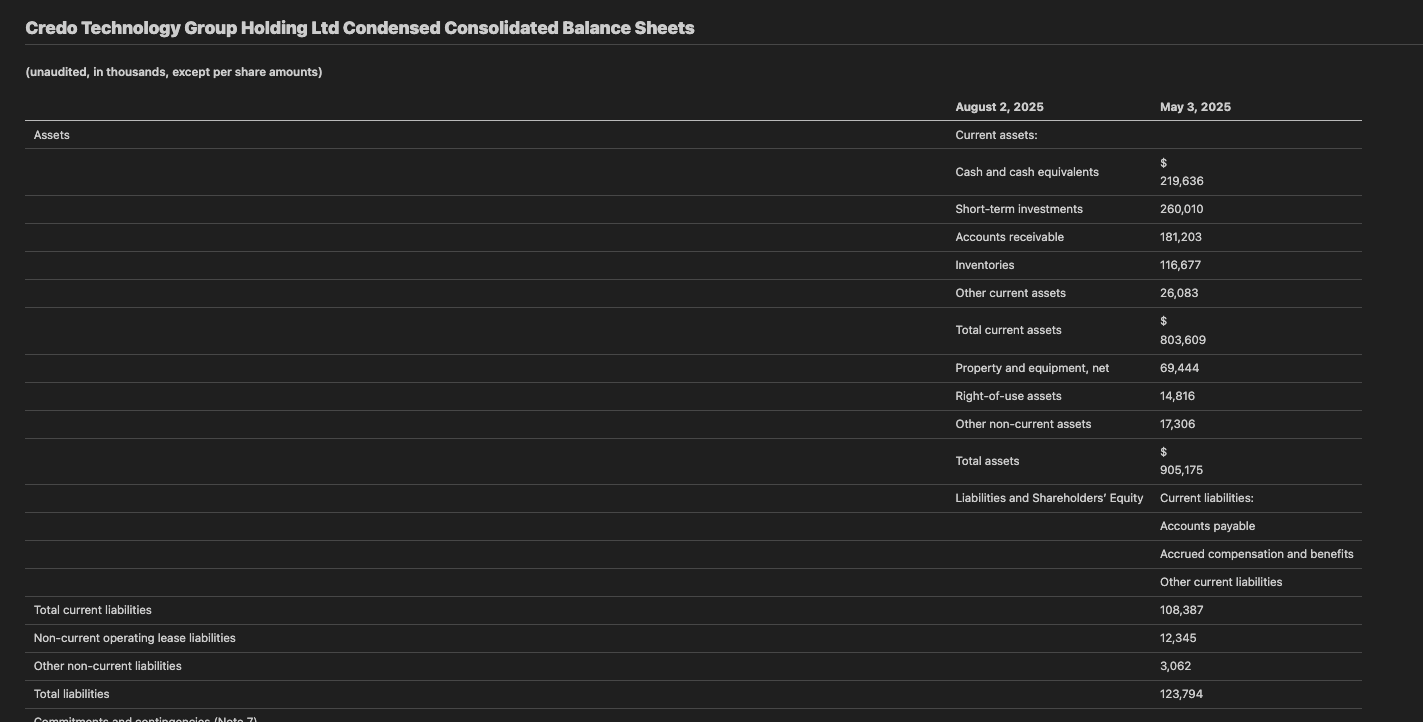

# try again with 32k max context -> seems better, but hard to tell if it's bcos of LLM nondeterminism lol

# try again with --force_ocr. it is much slower as "Recognizing Text" takes 1.5 min. still fails on shareholder equity table. starting to see quite a bit of typos, which is not good... ditching this and reverting back to --force_ocr

# TODO: try output_format := "chunks". they say it is suitable for RAG? 

In [57]:
rendered.metadata

{'table_of_contents': [{'title': 'UNITED STATES\nSECURITIES AND EXCHANGE COMMISSION',
   'heading_level': None,
   'page_id': 0,
   'polygon': [[149.26651000976562, 32.82183837890625],
    [334.6856994628906, 32.82183837890625],
    [334.6856994628906, 50.641815185546875],
    [149.26651000976562, 50.641815185546875]]},
  {'title': 'FORM 10-Q',
   'heading_level': None,
   'page_id': 0,
   'polygon': [[213.17333984375, 63.90234375],
    [270.54901123046875, 63.90234375],
    [270.54901123046875, 73.11660766601562],
    [213.17333984375, 73.11660766601562]]},
  {'title': 'Table of Contents',
   'heading_level': None,
   'page_id': 1,
   'polygon': [[215.251953125, 30.94921875],
    [259.97442626953125, 30.94921875],
    [259.97442626953125, 37.32550048828125],
    [215.251953125, 37.32550048828125]]},
  {'title': 'Special Note Regarding Forward-Looking Statements',
   'heading_level': None,
   'page_id': 2,
   'polygon': [[179.27333068847656, 31.171875],
    [298.1397399902344, 31.17187

In [43]:
rendered.metadata.keys()

dict_keys(['table_of_contents', 'page_stats', 'debug_data_path'])

In [49]:
len(rendered.metadata["table_of_contents"])

83

In [50]:
rendered.metadata["table_of_contents"][40:45]

[{'title': 'Legal Proceedings',
  'heading_level': None,
  'page_id': 15,
  'polygon': [[11.77880859375, 203.28515625],
   [58.090599060058594, 203.28515625],
   [58.090599060058594, 208.66542053222656],
   [11.77880859375, 208.66542053222656]]},
 {'title': '8. Leases',
  'heading_level': None,
  'page_id': 15,
  'polygon': [[4.38818359375, 261.17578125],
   [30.30386734008789, 261.17578125],
   [30.30386734008789, 266.88417053222656],
   [4.38818359375, 266.88417053222656]]},
 {'title': 'Credo Technology Group Holding Ltd\nNotes to Unaudited Condensed Consolidated Financial Statements',
  'heading_level': None,
  'page_id': 16,
  'polygon': [[164.79298400878906, 7.125],
   [312.5936279296875, 7.125],
   [312.5936279296875, 19.927459716796875],
   [164.79298400878906, 19.927459716796875]]},
 {'title': '9. Share Incentive Plan',
  'heading_level': None,
  'page_id': 16,
  'polygon': [[3.6953125, 237.57504272460938],
   [59.43149185180664, 237.57504272460938],
   [59.43149185180664, 242.

In [45]:
len(rendered.metadata["page_stats"])

30

In [9]:
rendered.metadata["page_stats"][:5]

[{'page_id': 0,
  'text_extraction_method': 'pdftext',
  'block_counts': [('Span', 114),
   ('TableCell', 112),
   ('Line', 36),
   ('SectionHeader', 2),
   ('Text', 2),
   ('Form', 1)],
  'block_metadata': {'llm_request_count': 2,
   'llm_error_count': 1,
   'llm_tokens_used': 20601,
   'previous_text': '',
   'previous_type': '',
   'previous_order': 0}},
 {'page_id': 1,
  'text_extraction_method': 'pdftext',
  'block_counts': [('Span', 96),
   ('TableCell', 85),
   ('Line', 21),
   ('Text', 2),
   ('SectionHeader', 1),
   ('TableOfContents', 1),
   ('PageFooter', 1),
   ('Reference', 1)],
  'block_metadata': {'llm_request_count': 1,
   'llm_error_count': 0,
   'llm_tokens_used': 3022,
   'previous_text': '',
   'previous_type': '',
   'previous_order': 0}},
 {'page_id': 2,
  'text_extraction_method': 'pdftext',
  'block_counts': [('Span', 83),
   ('Line', 29),
   ('ListItem', 13),
   ('Text', 3),
   ('SectionHeader', 1),
   ('PageFooter', 1),
   ('ListGroup', 1)],
  'block_metadata'

In [58]:
rendered.metadata["page_stats"][20:25]

[{'page_id': 20,
  'text_extraction_method': 'pdftext',
  'block_counts': [('Span', 57),
   ('Line', 29),
   ('Text', 7),
   ('SectionHeader', 2),
   ('PageFooter', 1)],
  'block_metadata': {'llm_request_count': 0,
   'llm_error_count': 0,
   'llm_tokens_used': 0,
   'previous_text': '',
   'previous_type': '',
   'previous_order': 0}},
 {'page_id': 21,
  'text_extraction_method': 'pdftext',
  'block_counts': [('Span', 59),
   ('TableCell', 27),
   ('Line', 22),
   ('Text', 5),
   ('Table', 1),
   ('Footnote', 1),
   ('SectionHeader', 1),
   ('PageFooter', 1),
   ('TableGroup', 1)],
  'block_metadata': {'llm_request_count': 1,
   'llm_error_count': 0,
   'llm_tokens_used': 1479,
   'previous_text': '',
   'previous_type': '',
   'previous_order': 0}},
 {'page_id': 22,
  'text_extraction_method': 'pdftext',
  'block_counts': [('Span', 175),
   ('TableCell', 103),
   ('Line', 39),
   ('SectionHeader', 5),
   ('Text', 4),
   ('Table', 3),
   ('PageFooter', 1)],
  'block_metadata': {'llm_r

In [65]:
next(iter(rendered.images.values()))